### Signal processing application in 3 mins long G critical simluated LFPs

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert, chirp
# import tools
# sys.path.append("/mnt/c/Users/wayne/tvb/tvbtools")
sys.path.append("/mnt/w/github/tvbtools")
from tools.signaltools import SignalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import example data
# filename = "/mnt/c/Users/wayne/tvb/gc3mins/SNC/2820A.h5"
filename = "/mnt/w/go3mins/SNC/2820A.h5"
# create an instance
subject = SignalToolkit(filename, fs=81920.)
dset = subject.hdf5_reader()
# indexing the pcg regions

spikesparas = {'prominence': 0.5, 'height': .5}
valleysparas= {'prominence': 1., 'width':3000, 'height': 0.}
spikesparas_af= {'prominence': 0.5, 'width':3000, 'height': 0.}


%matplotlib widget

pcg_left = subject.region_info_package(dset, 4, 'pcg_left', True, spikesparas, valleysparas,spikesparas_af)
pcg_right = subject.region_info_package(dset, 5, 'pcg_right', True, spikesparas, valleysparas,spikesparas_af)

/home/wayne/miniconda3/envs/tvbenv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


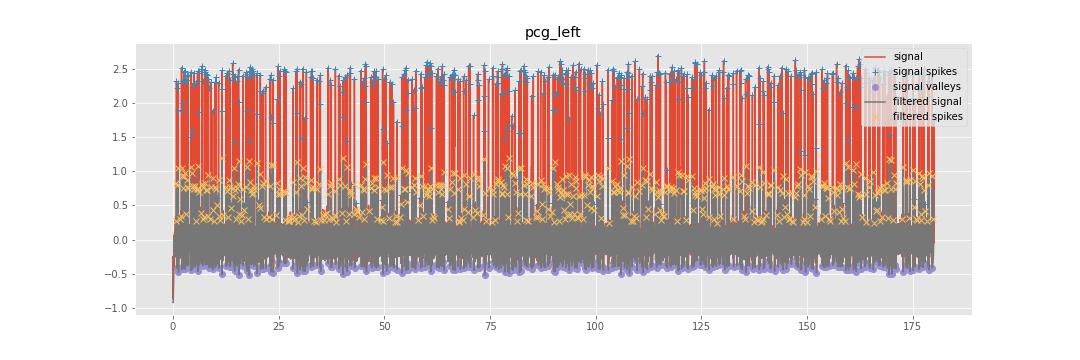

In [4]:
subject.signal_af(**pcg_left)
subject.signal_af(**pcg_right)

In [ ]:
subject.amp_count(data=pcg_right[data], spikeslist, valleyslist, mode = "peak2xais", visual=False, spikeslist_af:Optional[list] = None, after_filtered=None, N=None, delay=None, figsize=(15,5), digit=111)
#subjects.freq_count(spikeslist=spikeslist, visual=True, data=rawpcgleft)

In [ ]:
#subjects.psd(data = pcgleftAF, visual = True)

In [ ]:
# group analysis

